##  Taylor problem 5.2

last revised: 14-Jan-2019 by Dick Furnstahl [furnstahl.1@osu.edu]


The potential energy for two atoms in a molecule can sometimes be approximated by the Morse function

$\begin{align}
  U(r) = A\left[ \left(e^{(R-r)/S} -1\right)^2 -1 \right]
\end{align}$

for $0 < r < \infty$ with $A$, $R$, and $S$ all positive constants and $S \ll R$.

The goals are to find the equilibrium position $r_0$ and then the frequency of small oscillations.

Take the derivative and solve for the equilibrium $r_0$:

$\begin{align}
 \frac{dU}{dr} = 2A\left(e^{(R-r)/S} -1\right)\times e^{(R-r)/S} \times \frac{-1}{S} = 0
 \quad\Longrightarrow\quad
 r_0 = R
  \quad\Longrightarrow\quad
 U(r_0) = -A
\end{align}$

Expand around $r = r_0$ up to $(r - r_0)^2$ to find the small angle approximation equation and frequency:

$\begin{align}
U_{sa}(r) = A + \frac{A}{S^2} (r - r_0)^2
 \quad\Longrightarrow\quad
 k = \frac{2 A}{S^2}
 \quad\Longrightarrow\quad
 \omega = \sqrt{k/m} = \sqrt{\frac{2 A}{ m S^2}}
\end{align}$

## Make a plot to check $r_0$

In [29]:
%matplotlib notebook   
# Use notebook rather than inline so plot remains active between
#  cells and so we can zoom in.

In [40]:
import numpy as np

import matplotlib.pyplot as plt

In [78]:
def U_pot(r, lambda_0, big_R=1, U_0=1):
    """Potential from Taylor problem 5.13."""
    return U_0 * ((r/big_R) + (lambda_0**2) * (big_R/r))

def U_pot_min(lambda_0, big_R=1, U_0=1):
    """Returns the value of r at the minimum of U(r) and the value of
       U(r) at that point."""
    return lambda_0*big_R, U_0

In [79]:
def U_pot_sa(r, lambda_0, big_R=1, U_0=1):
    """Plot the potential in the small angle approximation"""
    r0 = lambda_0*big_R
    return  2*U_0*lambda_0 + (1/2)*U_0*2*(r - r0)**2 / (lambda_0*(big_R)**2) 


<IPython.core.display.Javascript object>


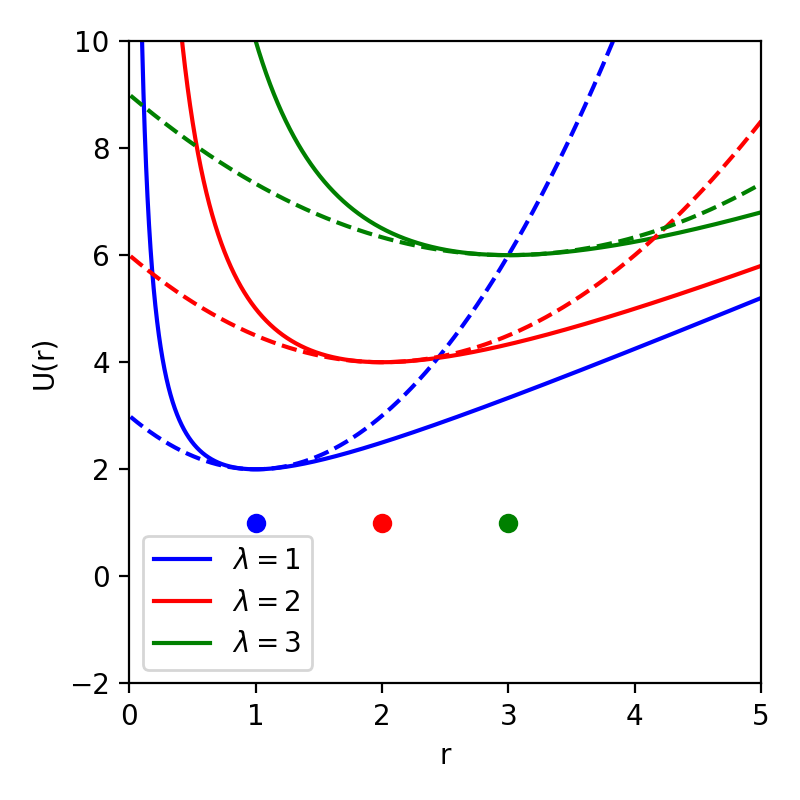

In [84]:
r_pts = np.arange(0.01, 6., .001)
U_pot_1 = U_pot(r_pts, lambda_0=1)
U_pot_2 = U_pot(r_pts, lambda_0=2)
U_pot_3 = U_pot(r_pts, lambda_0=3)

fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(1,1,1)
ax.plot(r_pts, U_pot_1, label=r'$\lambda=1$', color='blue')
ax.plot(r_pts, U_pot_2, label=r'$\lambda=2$', color='red')
ax.plot(r_pts, U_pot_3, label=r'$\lambda=3$', color='green')

ax.set_xlim(0.,5.)
ax.set_ylim(-2.,10)

x0, y0 = U_pot_min(lambda_0=1)
ax.scatter(x0, y0, color='blue')
x0, y0 = U_pot_min(lambda_0=2)
ax.scatter(x0, y0, color='red')
x0, y0 = U_pot_min(lambda_0=3)
ax.scatter(x0, y0, color='green')

ax.set_xlabel('r')
ax.set_ylabel('U(r)')

ax.legend()
fig.tight_layout()

Now put in small angle potentials (note that this changes the figure above, which is still the active figure (because we are using `%matplotlib notebook`).  Use the controls to zoom in to verify that the small-angle approximated $U(r)$ really does agree for $r$ close enough to the minimum.  

In [85]:
# "sa" here stands for "small-angle".
U_pot_sa_1 = U_pot_sa(r_pts, lambda_0=1)
U_pot_sa_2 = U_pot_sa(r_pts, lambda_0=2)
U_pot_sa_3 = U_pot_sa(r_pts, lambda_0=3)
ax.plot(r_pts, U_pot_sa_1, color='blue', ls='--')
ax.plot(r_pts, U_pot_sa_2, color='red', ls='--')
ax.plot(r_pts, U_pot_sa_3, color='green', ls='--')


Can we solve for exact and small angle oscillations numerically?